In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style(style='darkgrid')

import plotly.express as px

from sklearn.model_selection import train_test_split as tts
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn import tree
from sklearn import metrics as mtr

from IPython.display import Image as img
import subprocess

In [2]:
from sklearn.model_selection import GridSearchCV as gscv
from sklearn.model_selection import cross_validate as cv

# from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, classification_report

In [3]:
import warnings
warnings.filterwarnings('ignore')

pd.options.display.float_format = '{:,.4f}'.format        

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [4]:
df = pd.read_csv('online_shoppers_intention.csv') 

In [5]:
df.rename(columns={'Administrative':'Admin','Administrative_Duration':'Admin_dur','Informational':'Info','Informational_Duration':'Info_dur',
                   'ProductRelated':'Prod','ProductRelated_Duration':'Prod_dur','SpecialDay':'Spl_Prxmty','OperatingSystems':'OS'}, inplace=True)

In [6]:
df.head()

,Admin,Admin_dur,Info,Info_dur,Prod,Prod_dur,BounceRates,ExitRates,PageValues,Spl_Prxmty,Month,OS,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0000,0,0.0000,1,0.0000,0.2000,0.2000,0.0000,0.0000,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0000,0,0.0000,2,64.0000,0.0000,0.1000,0.0000,0.0000,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0000,0,0.0000,1,0.0000,0.2000,0.2000,0.0000,0.0000,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0000,0,0.0000,2,2.6667,0.0500,0.1400,0.0000,0.0000,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0000,0,0.0000,10,627.5000,0.0200,0.0500,0.0000,0.0000,Feb,3,3,1,4,Returning_Visitor,True,False


In [7]:
df.Browser.value_counts()

2     7961
1     2462
4      736
5      467
6      174
10     163
8      135
3      105
13      61
7       49
12      10
11       6
9        1
Name: Browser, dtype: int64

In [8]:
# Data for Browser 11 & 9 are dropped considering the smaller number of occurences which shouldn't influence the results

df1 = df.drop(df[((df.Browser == 9) | (df.Browser == 11) )].index, axis=0)

In [9]:
df1.TrafficType.value_counts()

2     3912
1     2448
3     2052
4     1069
13     738
10     450
6      444
8      342
5      260
11     246
20     198
9       42
7       40
15      38
19      17
14      12
18      10
16       3
12       1
17       1
Name: TrafficType, dtype: int64

In [10]:
# Data for TrafficTypes 16,12,17 are dropped considering the smaller number of occurences which shouldn't influence the results

df1.drop(df1[(df1.TrafficType == 17) | (df1.TrafficType == 12) | (df1.TrafficType == 16)].index,axis=0, inplace=True)

In [11]:
replaceStruct = {
    'OS':{1:'OS_1',2:'OS_2',3:'OS_3',4:'OS_4',5:'OS_5',6:'OS_6',7:'OS_7',8:'OS_8'},
    'Broswer':{1:'Browser_1',2:'Browser_2',3:'Browser_3',4:'Browser_4',5:'Browser_5',6:'Browser_6',7:'Browser_7',
               8:'Browser_8',9:'Browser_9',10:'Browser_10',11:'Browser_11',12:'Browser_12',13:'Browser_13'},
    'Region':{1:'Region_1',2:'Region_2',3:'Region_3',4:'Region_4',5:'Region_5',6:'Region_6',7:'Region_7',8:'Region_8',9:'Region_9'},
    'TrafficType':{1:'TrTyp_1',2:'TrTyp_2',3:'TrTyp_3',4:'TrTyp_4',5:'TrTyp_5',6:'TrTyp_6',7:'TrTyp_7',8:'TrTyp_8',
                   9:'TrTyp_9',10:'TrTyp_10',11:'TrTyp_11',12:'TrTyp_12',13:'TrTyp_13',14:'TrTyp_14',15:'TrTyp_15',16:'TrTyp_16',
                   17:'TrTyp_17',18:'TrTyp_18',19:'TrTyp_19',20:'TrTyp_20'},
    'Weekend':{False:'No',True:'Yes'}
}

In [12]:
# df1.replace(replaceStruct, inplace=True)

In [13]:
for col in {'OS','Browser','Region','TrafficType','Weekend','Month','VisitorType'}:
    df1[col] = df1[col].astype('category')

df1.Revenue = df1.Revenue.astype('int64')
df1.head(10)

,Admin,Admin_dur,Info,Info_dur,Prod,Prod_dur,BounceRates,ExitRates,PageValues,Spl_Prxmty,Month,OS,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0000,0,0.0000,1,0.0000,0.2000,0.2000,0.0000,0.0000,Feb,1,1,1,1,Returning_Visitor,False,0
1,0,0.0000,0,0.0000,2,64.0000,0.0000,0.1000,0.0000,0.0000,Feb,2,2,1,2,Returning_Visitor,False,0
2,0,0.0000,0,0.0000,1,0.0000,0.2000,0.2000,0.0000,0.0000,Feb,4,1,9,3,Returning_Visitor,False,0
3,0,0.0000,0,0.0000,2,2.6667,0.0500,0.1400,0.0000,0.0000,Feb,3,2,2,4,Returning_Visitor,False,0
4,0,0.0000,0,0.0000,10,627.5000,0.0200,0.0500,0.0000,0.0000,Feb,3,3,1,4,Returning_Visitor,True,0
5,0,0.0000,0,0.0000,19,154.2167,0.0158,0.0246,0.0000,0.0000,Feb,2,2,1,3,Returning_Visitor,False,0
6,0,0.0000,0,0.0000,1,0.0000,0.2000,0.2000,0.0000,0.4000,Feb,2,4,3,3,Returning_Visitor,False,0
7,1,0.0000,0,0.0000,0,0.0000,0.2000,0.2000,0.0000,0.0000,Feb,1,2,1,5,Returning_Visitor,True,0
8,0,0.0000,0,0.0000,2,37.0000,0.0000,0.1000,0.0000,0.8000,Feb,2,2,2,3,Returning_Visitor,False,0
9,0,0.0000,0,0.0000,3,738.0000,0.0000,0.0222,0.0000,0.4000,Feb,2,4,1,2,Returning_Visitor,False,0


In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12318 entries, 0 to 12329
Data columns (total 18 columns):
Admin          12318 non-null int64
Admin_dur      12318 non-null float64
Info           12318 non-null int64
Info_dur       12318 non-null float64
Prod           12318 non-null int64
Prod_dur       12318 non-null float64
BounceRates    12318 non-null float64
ExitRates      12318 non-null float64
PageValues     12318 non-null float64
Spl_Prxmty     12318 non-null float64
Month          12318 non-null category
OS             12318 non-null category
Browser        12318 non-null category
Region         12318 non-null category
TrafficType    12318 non-null category
VisitorType    12318 non-null category
Weekend        12318 non-null category
Revenue        12318 non-null int64
dtypes: category(7), float64(7), int64(4)
memory usage: 1.2 MB


In [15]:
df1.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Admin,"12,318.0000",NaN,NaN,NaN,2.3162,3.3229,0.0000,0.0000,1.0000,4.0000,27.0000
Admin_dur,"12,318.0000",NaN,NaN,NaN,80.7817,176.7064,0.0000,0.0000,7.5000,93.2562,"3,398.7500"
Info,"12,318.0000",NaN,NaN,NaN,0.5040,1.2707,0.0000,0.0000,0.0000,0.0000,24.0000
Info_dur,"12,318.0000",NaN,NaN,NaN,34.5049,140.8139,0.0000,0.0000,0.0000,0.0000,"2,549.3750"
Prod,"12,318.0000",NaN,NaN,NaN,31.7513,44.4921,0.0000,7.0000,18.0000,38.0000,705.0000
Prod_dur,"12,318.0000",NaN,NaN,NaN,"1,195.2616","1,914.4191",0.0000,184.1375,599.0000,"1,464.3649","63,973.5222"
BounceRates,"12,318.0000",NaN,NaN,NaN,0.0222,0.0485,0.0000,0.0000,0.0031,0.0168,0.2000
ExitRates,"12,318.0000",NaN,NaN,NaN,0.0431,0.0486,0.0000,0.0143,0.0251,0.0500,0.2000
PageValues,"12,318.0000",NaN,NaN,NaN,5.8929,18.5757,0.0000,0.0000,0.0000,0.0000,361.7637
Spl_Prxmty,"12,318.0000",NaN,NaN,NaN,0.0614,0.1988,0.0000,0.0000,0.0000,0.0000,1.0000


In [16]:
df1 = pd.get_dummies(df1,columns={'Month','OS','Browser','Region','TrafficType','VisitorType','Weekend'})

In [17]:
dfy = df1['Revenue'].copy()
dfX = df1.drop('Revenue', axis=1).copy()

## Using CV for validating dataset class imbalance

In [31]:
from sklearn.model_selection import cross_val_score
dtree = dtc(criterion='entropy',splitter='best')

scores = cross_val_score(dtree, dfX, dfy, cv=10)
print(scores,'\n')
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.87662338 0.90909091 0.91477273 0.87094156 0.87743506 0.78409091
 0.81818182 0.81006494 0.83184403 0.80666125] 

Accuracy: 0.85 (+/- 0.09)


In [34]:
scores = cross_val_score(dtree, dfX, dfy, cv=10, scoring='f1_macro')
print(scores,'\n')
print("F1 score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.66686773 0.81561437 0.81843489 0.74165181 0.75276722 0.65181645
 0.68344256 0.67518475 0.69946182 0.65717915] 

F1 score: 0.72 (+/- 0.12)


## Splitting train & test dataset

In [35]:
dfX_tr,dfX_ts,dfy_tr,dfy_ts = tts(dfX, dfy, test_size=0.3, random_state=6)

In [36]:
dfy_ts.value_counts(normalize=True)*100

0   84.5238
1   15.4762
Name: Revenue, dtype: float64

## Model selection & Choosing the best Hyper parameters based on GridSearchCV

In [72]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion':['entropy','gini'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5,6,7,8,9,10,12,15,20,30,50],
#     'min_impurity_decrease':[0.01,0.015,0.02,0.025,0.035,0.05,0.1,0.15,0.2]
}

grid = GridSearchCV(dtc(),param_grid,refit=True, verbose=True, n_jobs=-1, scoring='accuracy')
gfit = grid.fit(dfX_tr,dfy_tr)

# print best parameter after tuning 
print('Best Params : ',grid.best_params_) 
grid_predictions = grid.predict(dfX_ts) 
   
# print classification report 
print(mtr.classification_report(dfy_ts, grid_predictions)) 

print("----\n")

print("Best score: %0.3f" % gfit.best_score_)
print(gfit.best_estimator_)


Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.6s


Best Params :  {'criterion': 'gini', 'max_depth': 4, 'splitter': 'best'}
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      3124
           1       0.79      0.52      0.63       572

    accuracy                           0.90      3696
   macro avg       0.85      0.75      0.79      3696
weighted avg       0.90      0.90      0.90      3696

----

Best score: 0.901
DecisionTreeClassifier(max_depth=4)


[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    2.9s finished


In [73]:
# dtree = dtc(criterion='entropy',splitter='best',min_impurity_decrease=0.01 )
dtree = dtc(criterion='entropy',splitter='best',max_depth=4 )

dtree.fit(dfX_tr, dfy_tr)
print(dtree.score(dfX_tr, dfy_tr))
print(dtree.score(dfX_ts, dfy_ts))

0.9032707028531664
0.9036796536796536


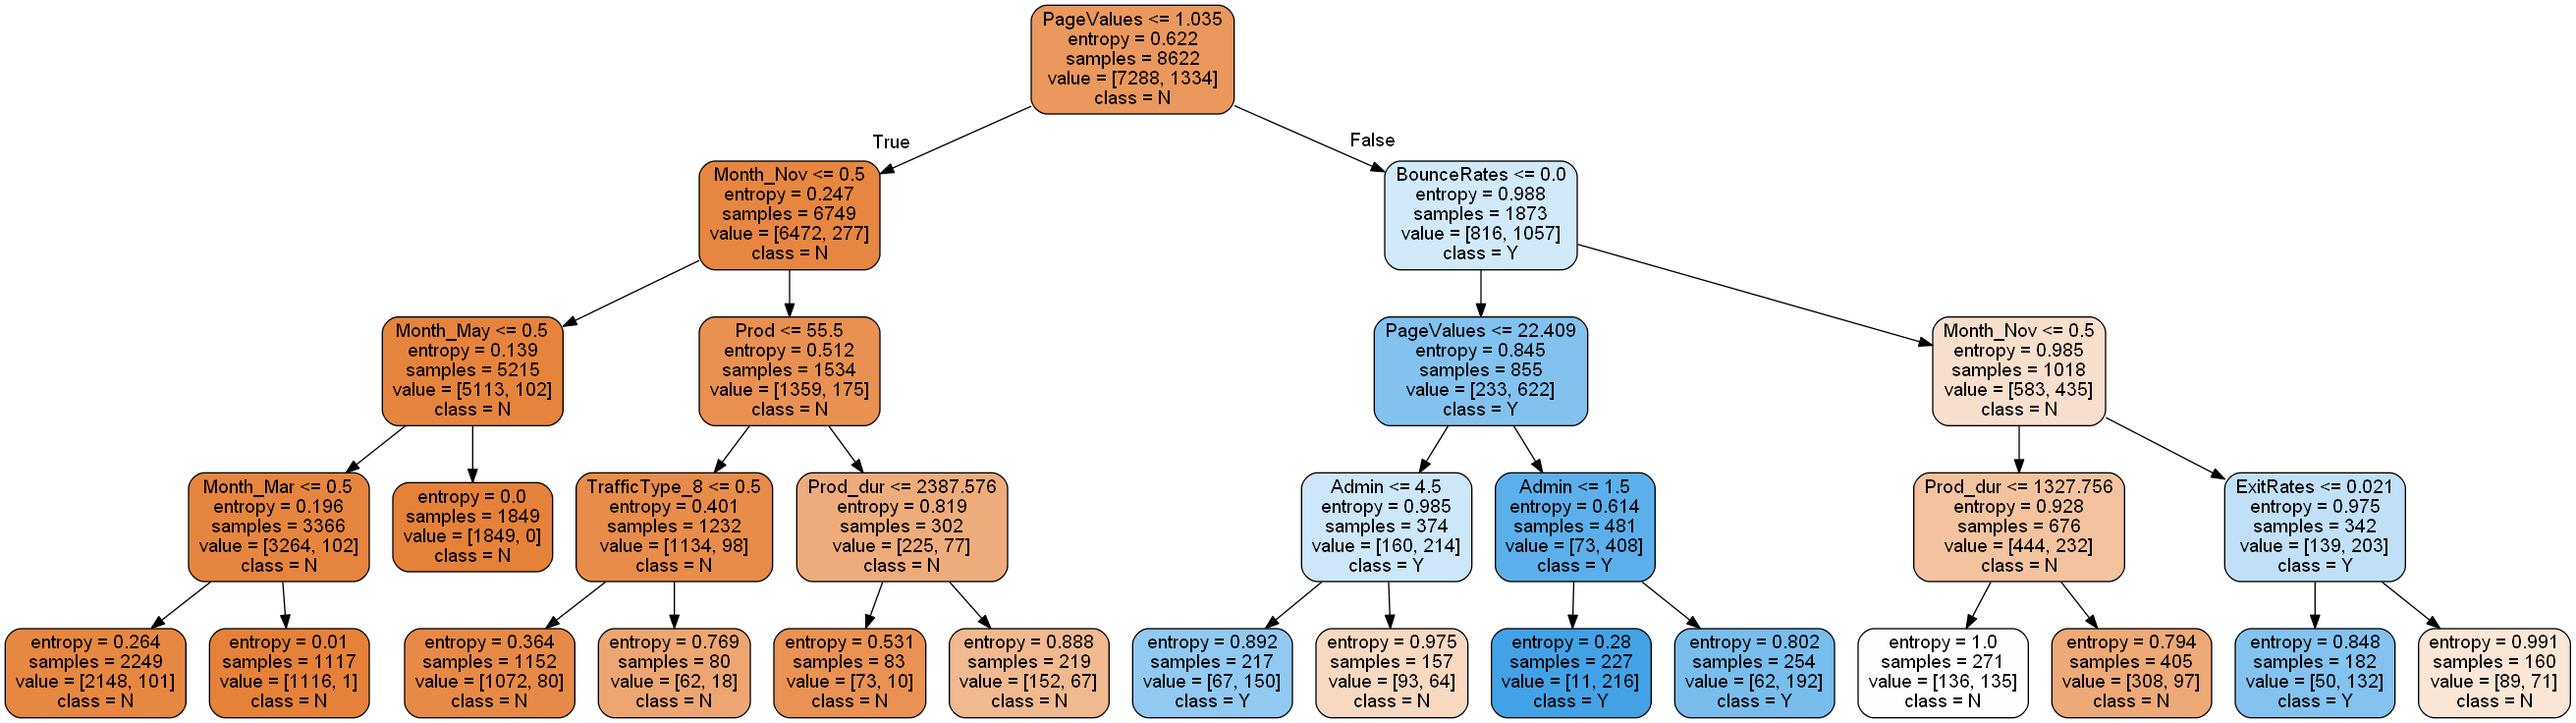

In [74]:
char_labels = ['N','Y']
dtree_file = open('shopping_tree.dot','w')
dot_data = tree.export_graphviz(dtree, out_file=dtree_file, feature_names=list(dfX_tr), class_names=list(char_labels),
                               label='all', filled=True, rounded=True )
dtree_file.close()

retcode = subprocess.call('dot -Tpng shopping_tree.dot -o shopping_tree.png',shell=True)
if(retcode > 0):
    print('Error running Graphviz; error code: ', str(retcode))
else:
    display(img('shopping_tree.png'))


In [75]:
print(pd.DataFrame(dtree.feature_importances_, columns=['Imp'],index=dfX_tr.columns).sort_values('Imp',ascending=False).head())

               Imp
PageValues  0.7556
Month_Nov   0.0792
BounceRates 0.0500
Month_May   0.0259
Month_Mar   0.0212


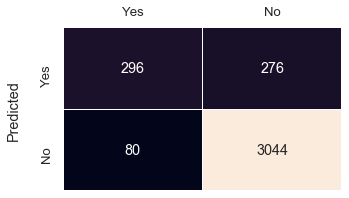

In [76]:
y_pred = dtree.predict(dfX_ts)
cmat = mtr.confusion_matrix(dfy_ts,y_pred, labels=[1,0])
dfcm = pd.DataFrame(cmat, index=['Yes','No'],columns=['Yes','No'])
plt.figure(figsize=[5,3])
sns.set(font_scale=1.2)
fig = sns.heatmap(dfcm, annot=True, fmt='d',linewidth=0.5, cbar=False)
plt.tick_params(axis='both', which='major', labelbottom = False, bottom=False, top = False, labeltop=True)
plt.ylabel('Predicted\n')
plt.show()